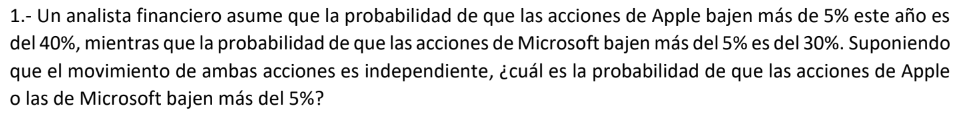

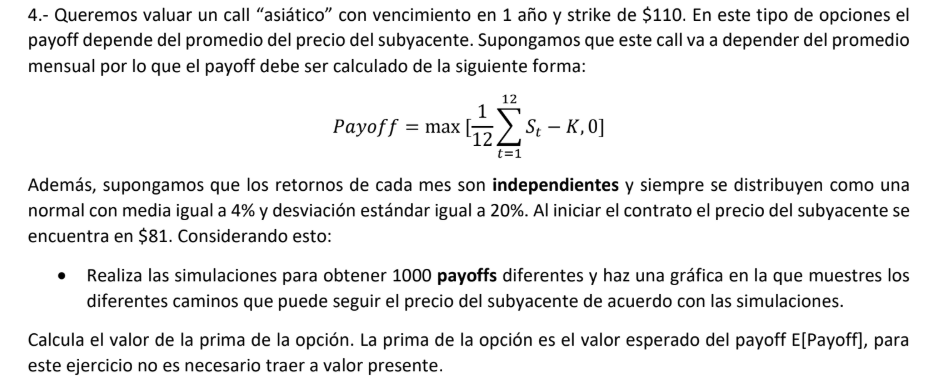

Notas

Derivado financiero: Es un instrumento cuyo valor depende (deriva) del precio o comportamiento de otro activo, llamado activo subyacente.
El payoff indica cuánto gana o pierde el tenedor del derivado una vez que se conoce el valor del subyacente.

-----------------------------------------------------

Call asiático -> Recibir un pago positivo si el promedio del subyacente durante la vida del contrato supera el precio de ejercicio K


St es el precio del activo en el periodo t
n es el número de observaciones (12 meses)
K es el strike

-----------------------------------------------------


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
S0 = 81
K = 110
mu = 0.04
sigma = 0.20
T = 12 #Un año
N = 1000 #simulaciones

np.random.seed(42)

# Simulación de retornos
returns = np.random.normal(mu, sigma, size=(N, T))

# Simulación de precios
prices = np.zeros((N, T))
prices[:, 0] = S0 * np.exp(returns[:, 0])

for t in range(1, T):
    prices[:, t] = prices[:, t-1] * np.exp(returns[:, t])

# Promedio mensual del precio
average_prices = prices.mean(axis=1)

# Payoffs
payoffs = np.maximum(average_prices - K, 0)

# Prima (valor esperado del payoff)
option_price = payoffs.mean()

option_price


np.float64(26.304000178979482)

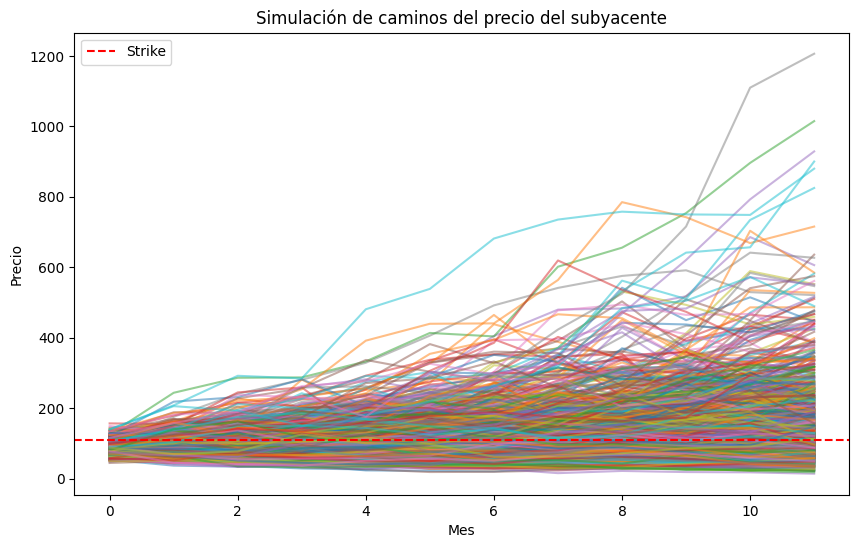

In [8]:
plt.figure(figsize=(10,6))

for i in range(1000):  # mostramos solo 100 para claridad
    plt.plot(prices[i], alpha=0.5)

plt.axhline(K, color='red', linestyle='--', label='Strike')
plt.title('Simulación de caminos del precio del subyacente')
plt.xlabel('Mes')
plt.ylabel('Precio')
plt.legend()
plt.show()
